# Flight Fare Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

%matplotlib inline


In [2]:
df=pd.read_csv("Clean_Dataset.csv.zip")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
df.shape

(300153, 11)

In [10]:
df.size

3301683

Text(0, 0.5, 'Price')

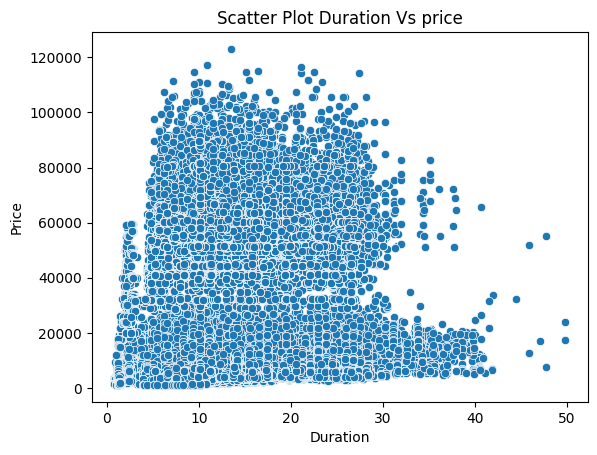

In [11]:
sns.scatterplot(x='duration',y='price',data=df)
plt.title("Scatter Plot Duration Vs price")
plt.xlabel("Duration")
plt.ylabel("Price")

In [12]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

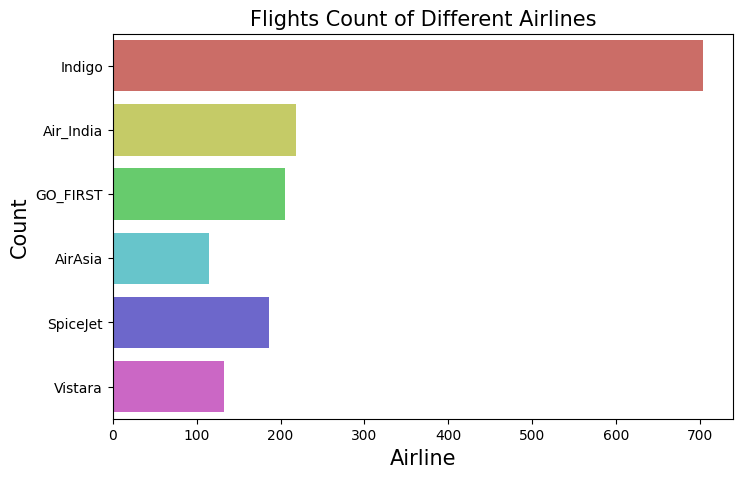

In [13]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [14]:
df2=df.groupby(['airline','flight','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

Text(0.5, 1.0, 'Classes of Diferent Airlines')

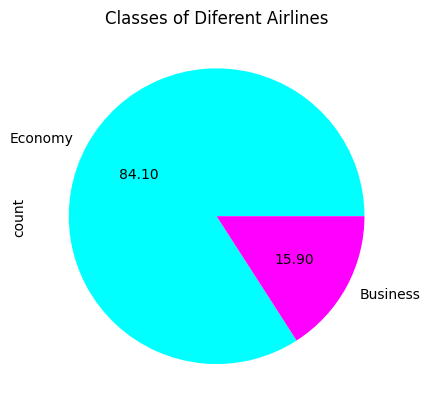

In [15]:
df2['class'].value_counts().plot(kind='pie',autopct='%.2f',cmap="cool")
plt.title("Classes of Diferent Airlines")


Text(0, 0.5, 'Price')

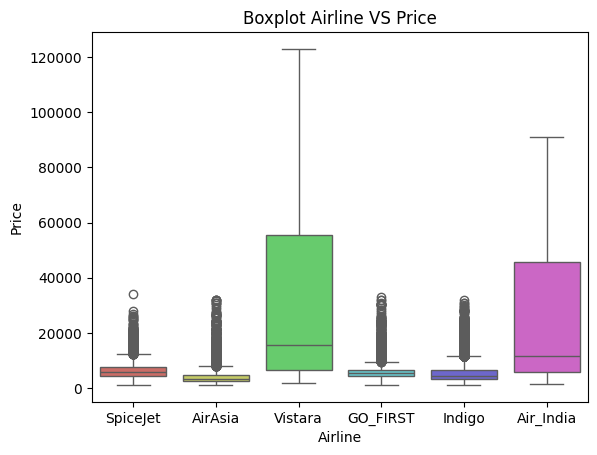

In [16]:
sns.boxplot(x='airline',y='price',data=df,palette='hls')
plt.title("Boxplot Airline VS Price")
plt.xlabel("Airline")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

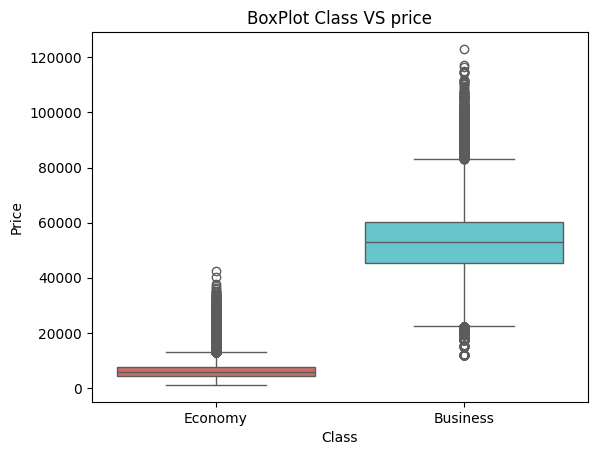

In [17]:
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title("BoxPlot Class VS price")
plt.xlabel("Class")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

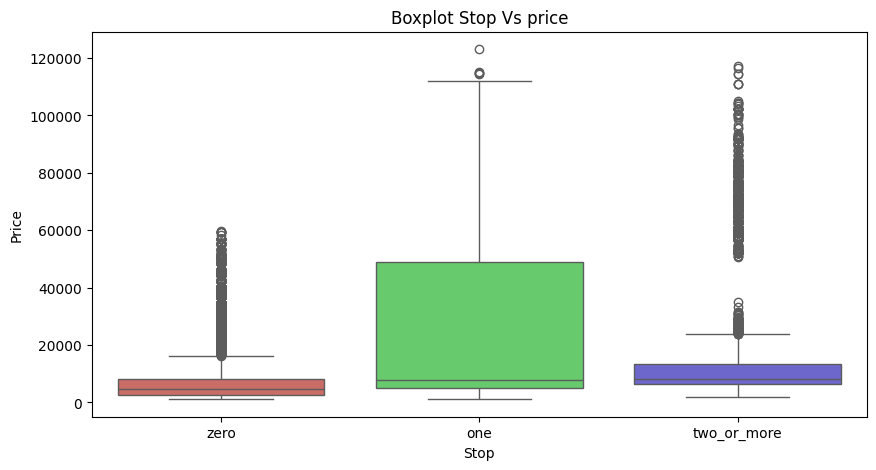

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title("Boxplot Stop Vs price")
plt.xlabel("Stop")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

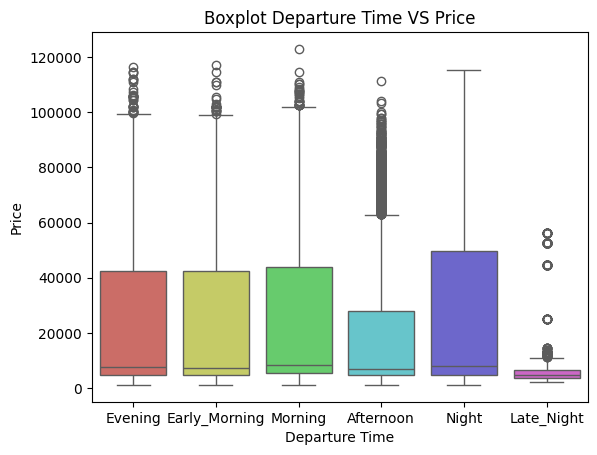

In [19]:
sns.boxplot(x="departure_time",y='price',data=df,palette='hls')
plt.title("Boxplot Departure Time VS Price")
plt.xlabel("Departure Time")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

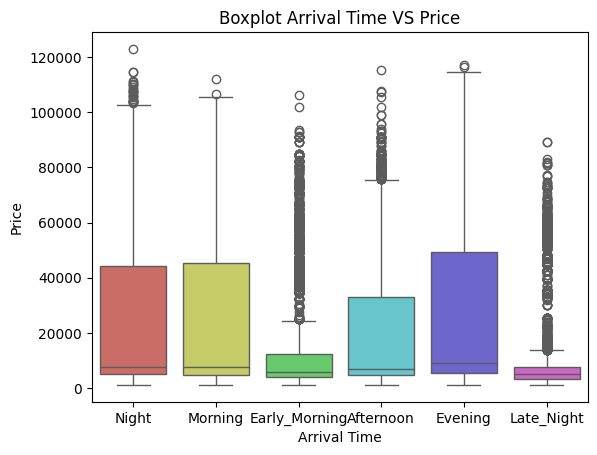

In [20]:
sns.boxplot(x="arrival_time",y='price',data=df,palette='hls')
plt.title("Boxplot Arrival Time VS Price")
plt.xlabel("Arrival Time")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

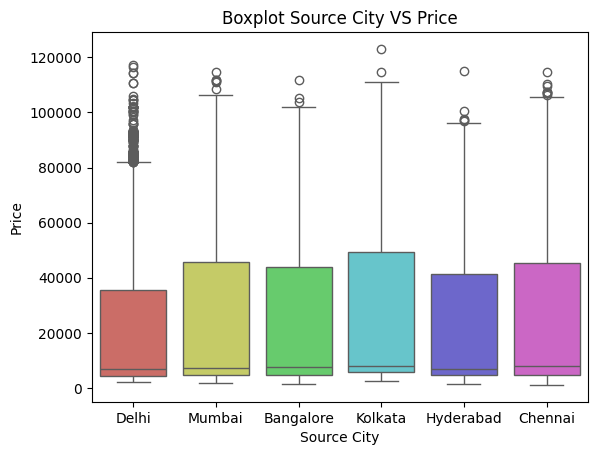

In [21]:
sns.boxplot(x="source_city",y='price',data=df,palette='hls')
plt.title("Boxplot Source City VS Price")
plt.xlabel("Source City")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

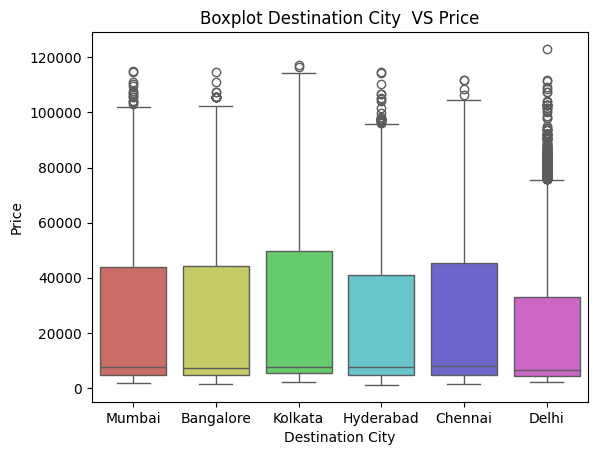

In [22]:
sns.boxplot(x="destination_city",y='price',data=df,palette='hls')
plt.title("Boxplot Destination City  VS Price")
plt.xlabel("Destination City")
plt.ylabel("Price")

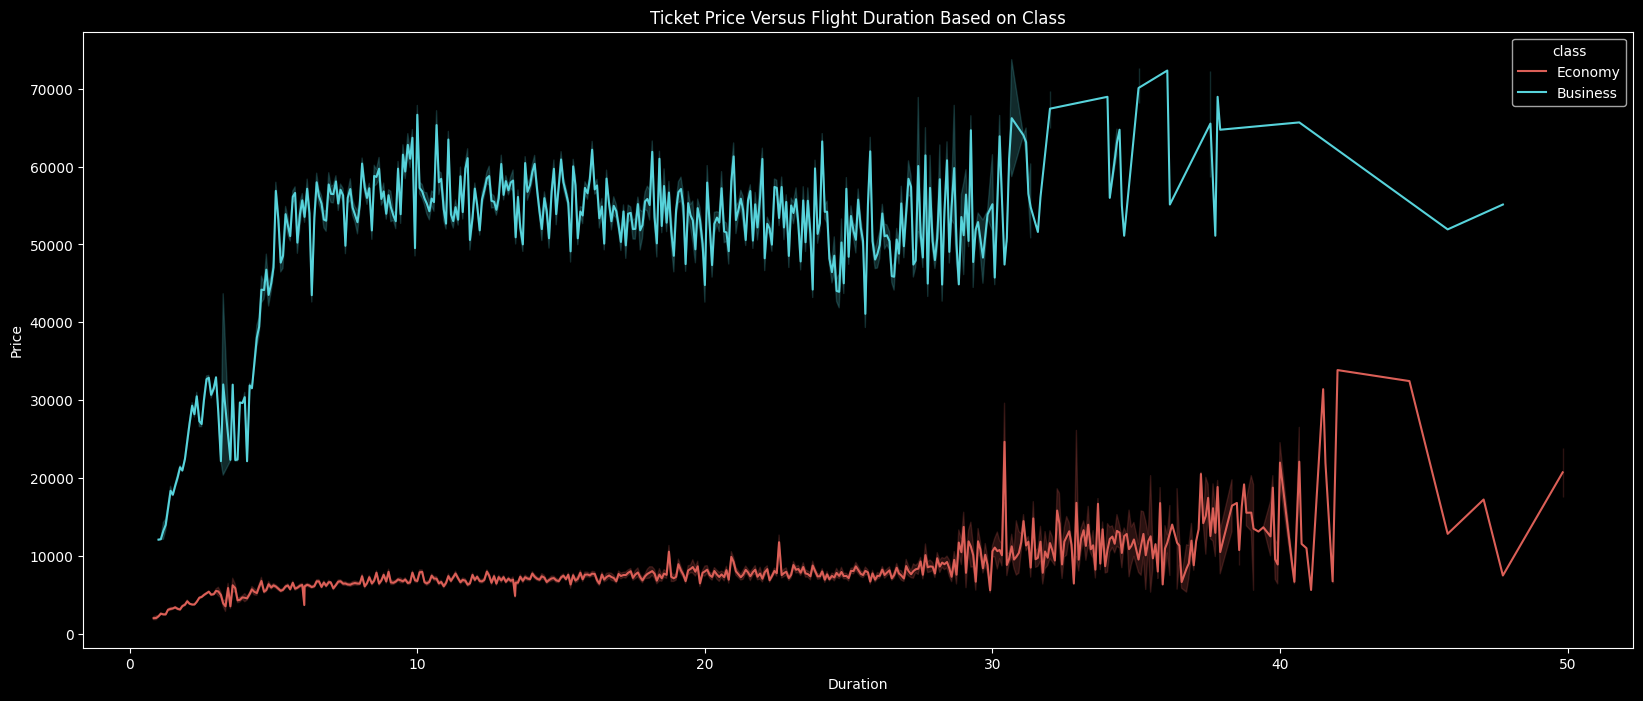

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()


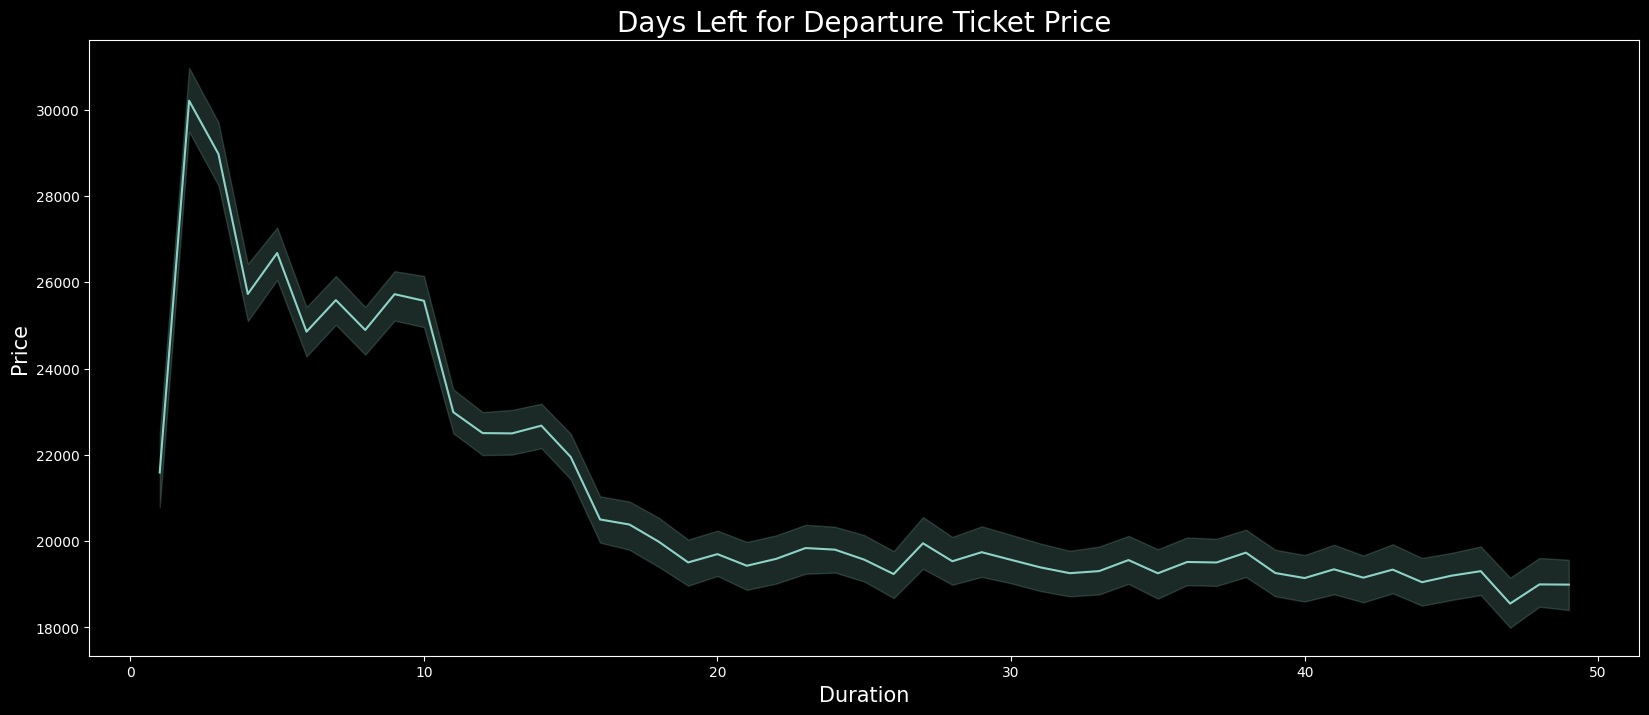

In [24]:

plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',palette='hls')
plt.title('Days Left for Departure Ticket Price',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


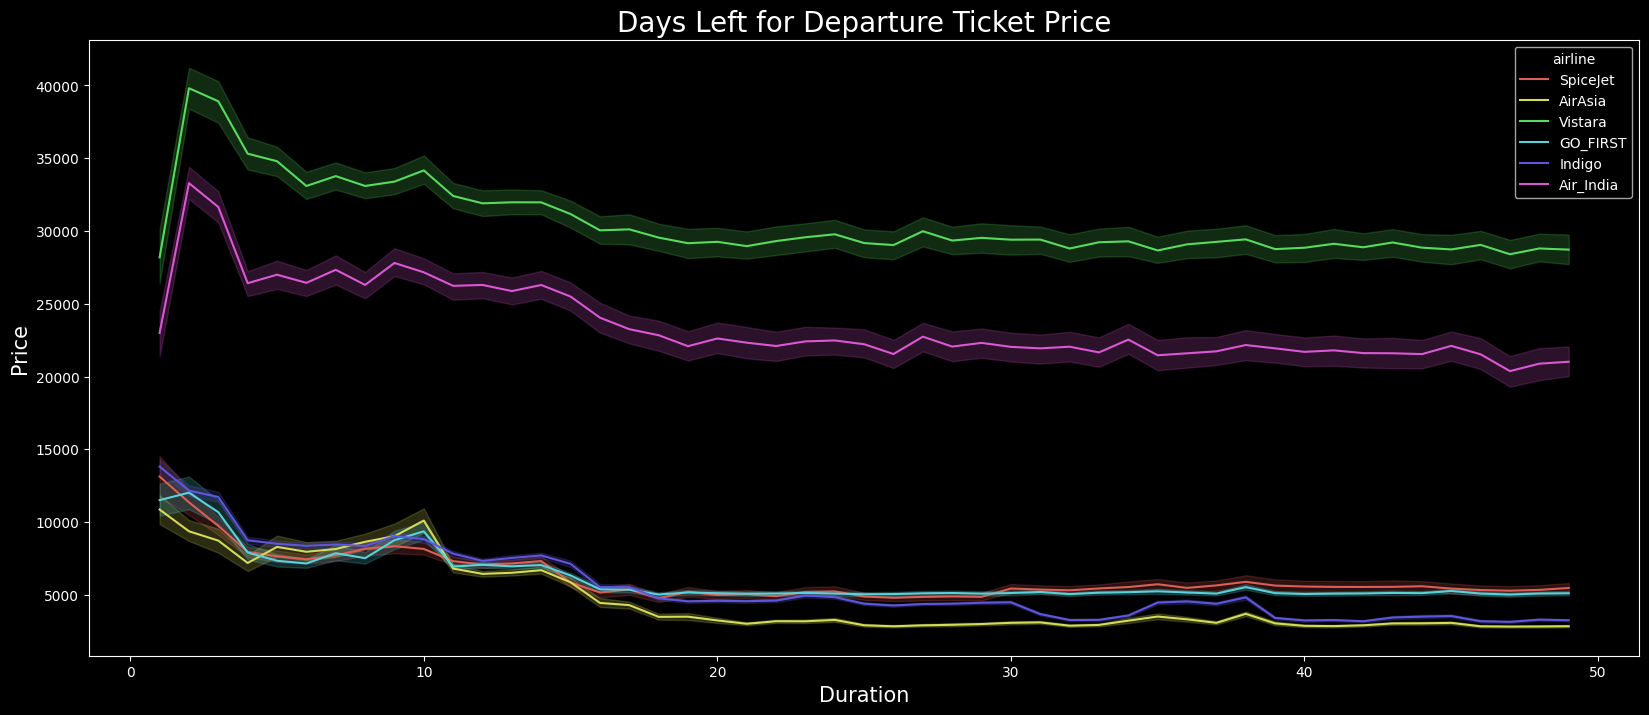

In [25]:

plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',palette='hls',hue='airline')
plt.title('Days Left for Departure Ticket Price',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


In [26]:
df.groupby(['airline','class','source_city','destination_city','flight'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [27]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [28]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [29]:
#set features and target
x=df.drop('price',axis=1)
y=df['price']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [32]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
x_test

array([[-1.14944134, -0.80133282, -0.32996457, ...,  0.67249446,
         1.16531921,  1.02963757],
       [ 1.03188121,  0.82704289,  0.81198678, ..., -1.48700109,
        -0.27586421,  1.17704085],
       [ 1.03188121,  0.85519924,  0.81198678, ...,  0.67249446,
        -0.17852622,  1.10333921],
       ...,
       [-0.05878006, -2.49306031, -0.32996457, ...,  0.67249446,
        -1.38871351,  1.17704085],
       [-0.05878006, -1.77741969,  1.38296245, ...,  0.67249446,
        -0.89330671,  1.10333921],
       [-0.6041107 ,  0.05039684, -1.47191592, ...,  0.67249446,
        -1.34077091,  1.39814577]], shape=(90046, 10))

In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
print("Coefficient or slope: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficient or slope:  [  1687.13886757    105.53392911    185.60835551     62.11983416
  -2187.82471559    322.01766406    213.84769313 -20622.3944994
    651.54091406  -1787.55419632]
Intercept:  20895.951581813075


In [38]:
y_pred=lr.predict(x_test)
y_pred

array([ 4639.84458483, 52897.51021274,  7949.00018802, ...,
       -2110.0857074 ,  5890.6237155 , -3381.58404661], shape=(90046,))

In [39]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared Error:",rmse)

Mean Absolute Error: 4630.295613607966
Mean Squared Error: 49070241.26461271
Root Mean squared Error: 7005.015436429296


In [40]:
from sklearn.metrics import r2_score
print("Accuray R2 score",r2_score(y_test,y_pred))

Accuray R2 score 0.9046562364171973


In [41]:
from sklearn import metrics

r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.904653


In [42]:
from sklearn.tree import DecisionTreeRegressor


In [43]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [44]:
y_pred=dtr.predict(x_test)
y_pred

array([ 7366., 81284.,  6195., ...,  2410.,  2835.,  3393.],
      shape=(90046,))

In [45]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared Error:",rmse)

Mean Absolute Error: 1258.829296507711
Mean Squared Error: 13776673.221176153
Root Mean squared Error: 3711.6941174046324


In [46]:
print("Accuray R2 score",r2_score(y_test,y_pred))

Accuray R2 score 0.9732318439708875


In [47]:


r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.973231


In [48]:
from sklearn.ensemble import RandomForestRegressor


In [49]:
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
y_pred=rfg.predict(x_test)
y_pred

array([ 7348.23, 80954.05,  6331.25, ...,  2514.25,  3371.64,  3506.37],
      shape=(90046,))

In [51]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared Error:",rmse)

Mean Absolute Error: 1172.646325433487
Mean Squared Error: 8266256.080446553
Root Mean squared Error: 2875.109751026307


In [52]:
print("Accuray R2 score",r2_score(y_test,y_pred))

Accuray R2 score 0.9839386164580085


In [53]:


r_squared = round(metrics.r2_score(y_test, y_pred),6)
adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
print('Adj R Square: ', adjusted_r_squared)

Adj R Square:  0.983938


In [54]:
corr=df.corr()

<Axes: >

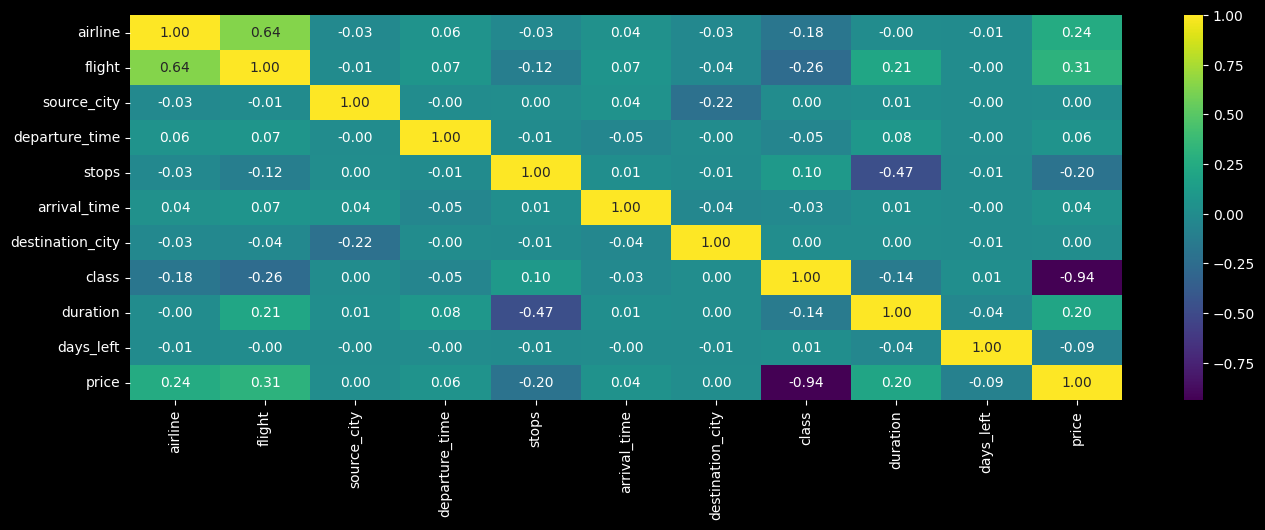

In [55]:
plt.figure(figsize=(16,5))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='viridis')

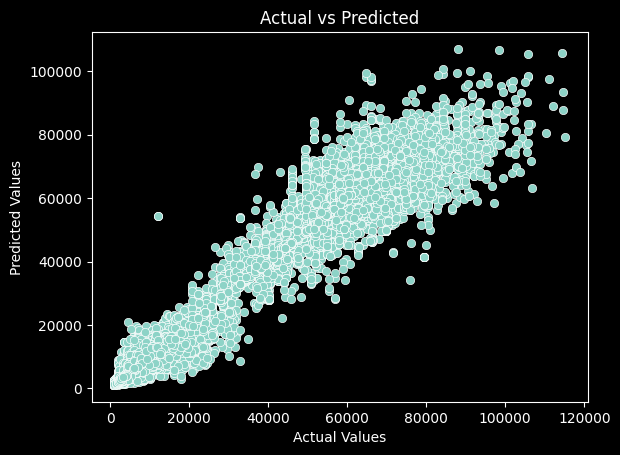

In [56]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

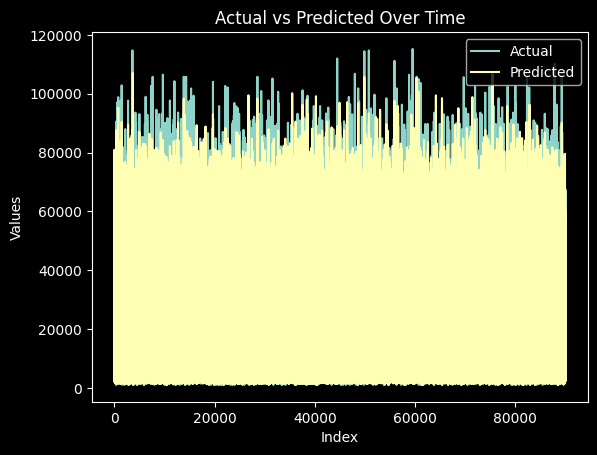

In [57]:
sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual')
sns.lineplot(x=range(len(y_pred)), y=y_pred, label='Predicted')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Over Time")
plt.legend()
plt.show()